In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('cofee_sales.csv')

df.head()           # Show first few rows
df.info()           # Show data types
df.isnull().sum()   # Show missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [4]:
# Fill missing 'money' column with median
df['money'].fillna(df['money'].median(), inplace=True)

# Fill missing 'coffee_name' and 'cash_type' with mode
df['coffee_name'].fillna(df['coffee_name'].mode()[0], inplace=True)
df['cash_type'].fillna(df['cash_type'].mode()[0], inplace=True)

# Convert date columns to datetime
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])

# Create new columns: month, day, hour
df['month'] = df['date'].dt.strftime('%Y-%m')
df['day'] = df['date'].dt.


SyntaxError: invalid syntax (3176482941.py, line 14)

In [5]:
# Fill missing 'money' column with median
df['money'].fillna(df['money'].median(), inplace=True)

# Fill missing 'coffee_name' and 'cash_type' with mode
df['coffee_name'].fillna(df['coffee_name'].mode()[0], inplace=True)
df['cash_type'].fillna(df['cash_type'].mode()[0], inplace=True)

# Convert date columns to datetime
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])

# Create new columns: month, day, hour
df['month'] = df['date'].dt.strftime('%Y-%m')
df['day'] = df['date'].dt.


SyntaxError: invalid syntax (3176482941.py, line 14)

In [6]:
# Fill missing 'money' column with median
df['money'].fillna(df['money'].median(), inplace=True)

# Fill missing 'coffee_name' and 'cash_type' with mode
df['coffee_name'].fillna(df['coffee_name'].mode()[0], inplace=True)
df['cash_type'].fillna(df['cash_type'].mode()[0], inplace=True)

# Convert date columns to datetime
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])

# Create new columns: month, day, hour
df['month'] = df['date'].dt.strftime('%Y-%m')
df['day'] = df['date'].dt.strftime('%w')   # 0=Sunday
df['hour'] = df['datetime'].dt.strftime('%H')


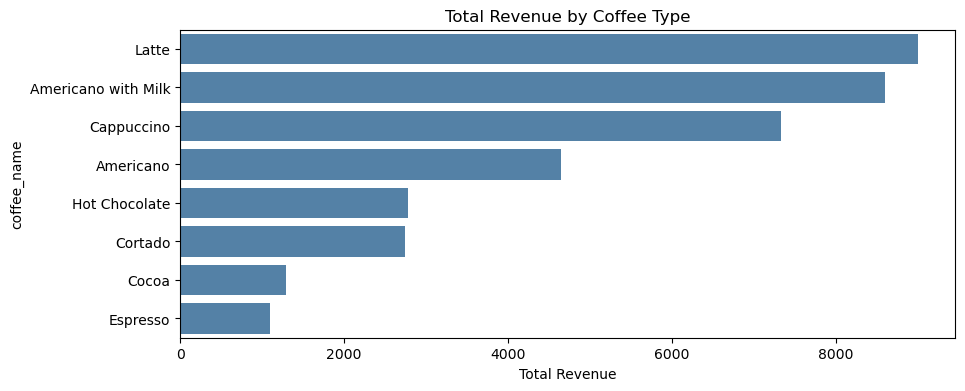

In [7]:
revenue_data = df.groupby('coffee_name')['money'].sum().reset_index().sort_values(by='money', ascending=False)

plt.figure(figsize=(10,4))
sns.barplot(data=revenue_data, x='money', y='coffee_name', color='steelblue')
plt.xlabel('Total Revenue')
plt.title('Total Revenue by Coffee Type')
plt.show()


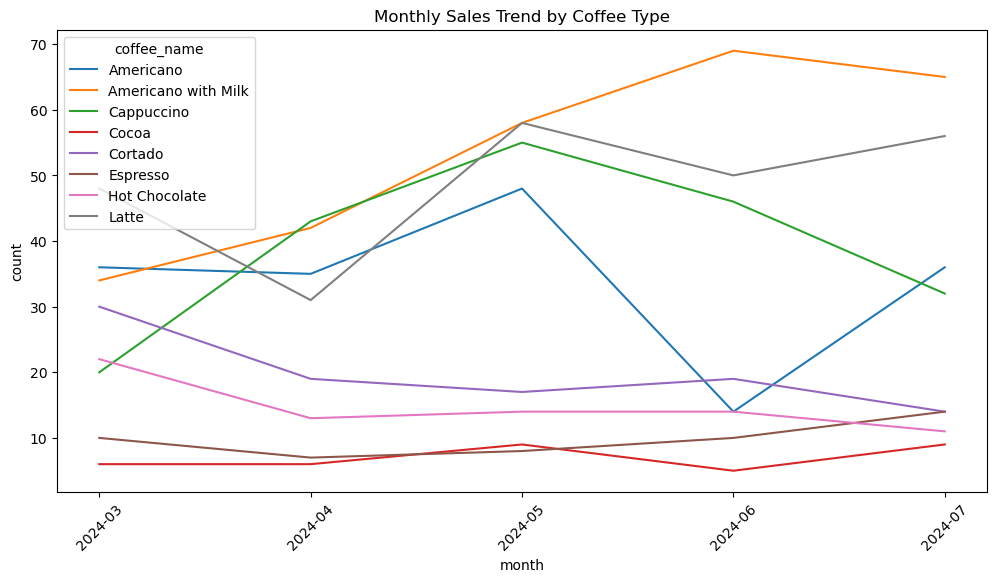

In [8]:
monthly_sales = df.groupby(['month', 'coffee_name']).size().reset_index(name='count')

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='month', y='count', hue='coffee_name')
plt.title('Monthly Sales Trend by Coffee Type')
plt.xticks(rotation=45)
plt.show()


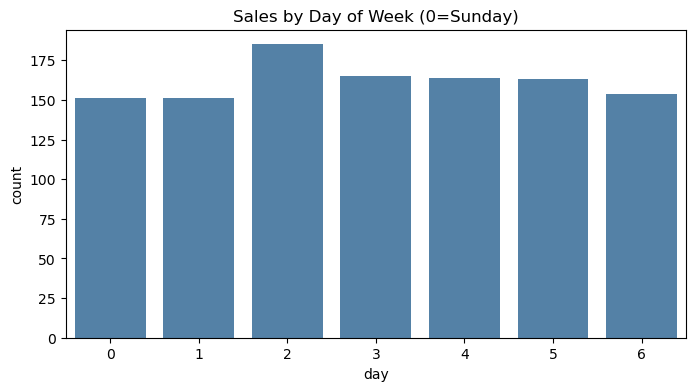

In [9]:
weekday_sales = df.groupby('day').size().reset_index(name='count')

plt.figure(figsize=(8,4))
sns.barplot(data=weekday_sales, x='day', y='count', color='steelblue')
plt.title('Sales by Day of Week (0=Sunday)')
plt.show()


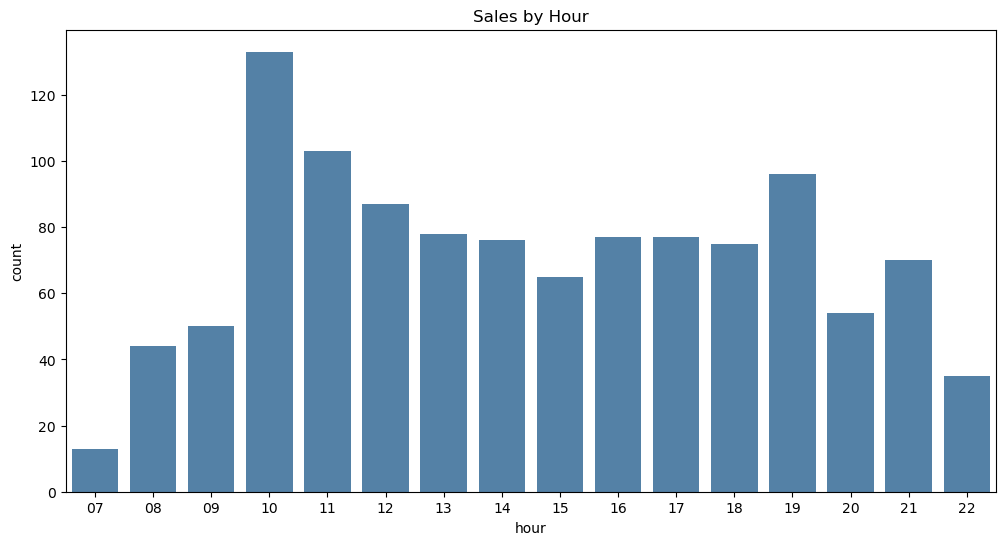

In [10]:
hourly_sales = df.groupby('hour').size().reset_index(name='count')

plt.figure(figsize=(12,6))
sns.barplot(data=hourly_sales, x='hour', y='count', color='steelblue')
plt.title('Sales by Hour')
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data: one-hot encode categorical variables
X = pd.get_dummies(df[['coffee_name', 'month', 'day', 'hour']], drop_first=True)
y = df['money']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.9154658806822741
R^2 Score: 0.9508249540374448


In [12]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False)


,Coefficient
coffee_name_Cocoa,9.894934
coffee_name_Cappuccino,9.826175
coffee_name_Latte,9.802704
coffee_name_Hot Chocolate,9.768789
coffee_name_Americano with Milk,4.935227
hour_22,0.402342
hour_16,0.381339
hour_10,0.264444
day_5,0.194426
day_3,0.148952


## Conclusion

- The dataset has 1133 transactions from March to July 2024.
- Latte and Americano with Milk generated the most revenue.
- Most transactions are paid by card (~92%).
- Peak sales times are around 10 AM and 7 PM.
- Simple linear regression model gives basic prediction of sales.
- This analysis can help plan inventory, decide restock times, and understand customer behavior.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


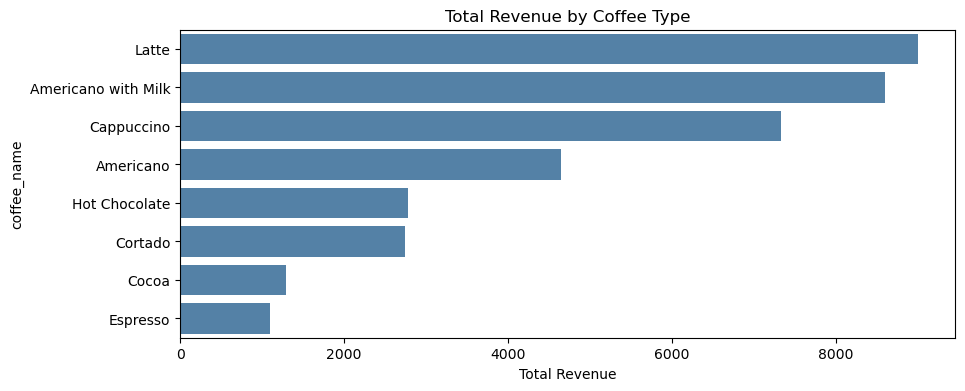

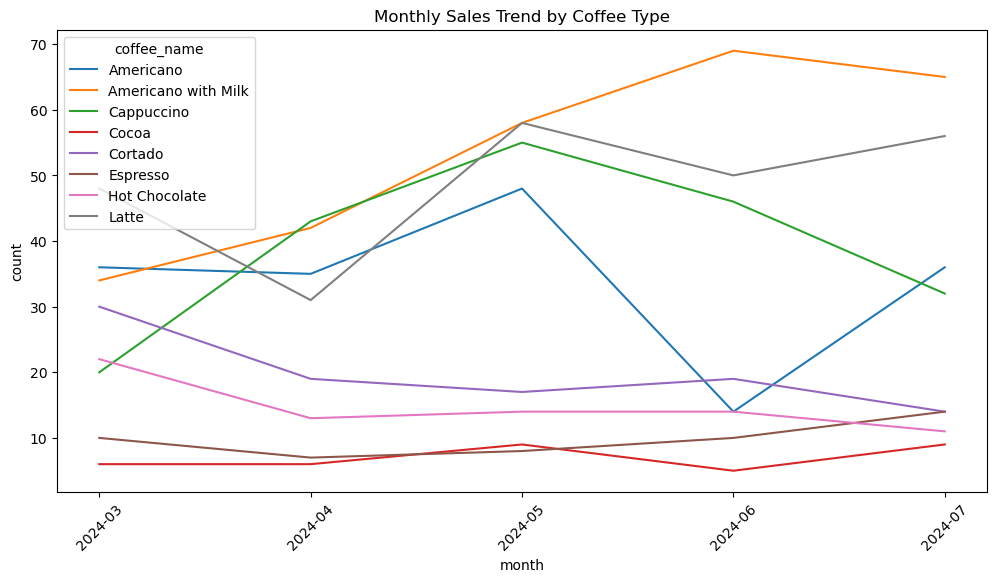

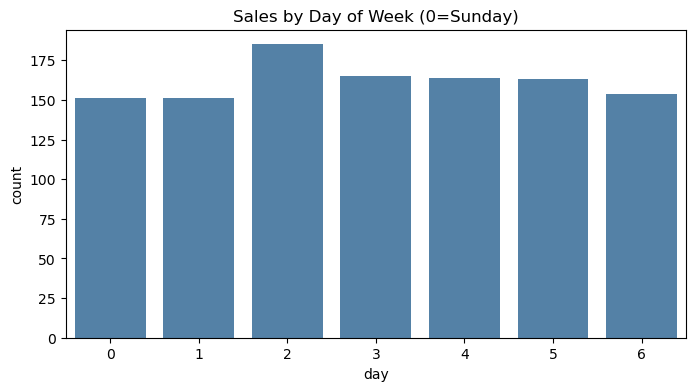

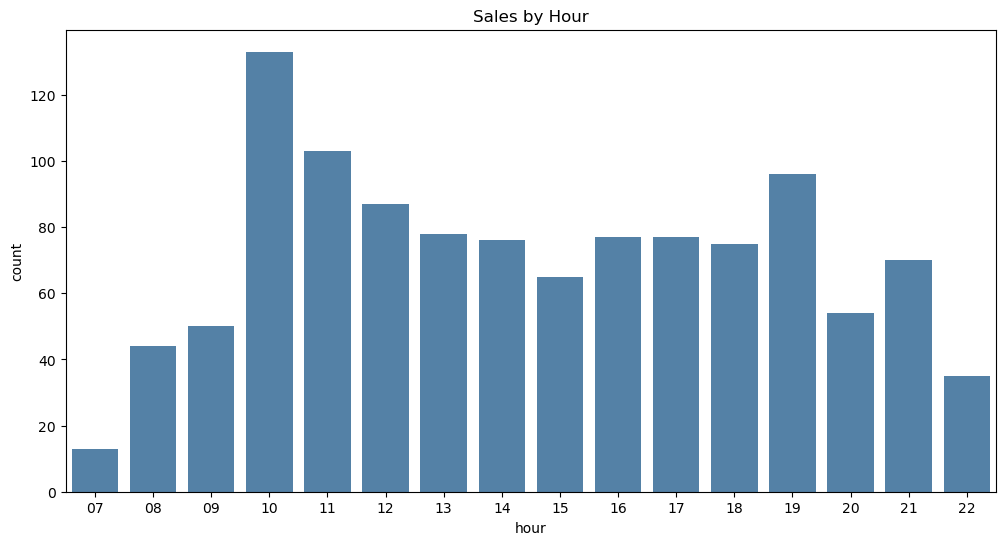

Mean Squared Error: 0.9154658806822741
R^2 Score: 0.9508249540374448


,Coefficient
coffee_name_Cocoa,9.894934
coffee_name_Cappuccino,9.826175
coffee_name_Latte,9.802704
coffee_name_Hot Chocolate,9.768789
coffee_name_Americano with Milk,4.935227
hour_22,0.402342
hour_16,0.381339
hour_10,0.264444
day_5,0.194426
day_3,0.148952


In [13]:
# 📊 Coffee Sales Data Analysis Project

# ✅ STEP 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# ✅ STEP 2: Load data
df = pd.read_csv('cofee_sales.csv')
df.head()
df.info()
df.isnull().sum()

# ✅ STEP 3: Data cleaning & feature engineering
# Fill missing 'money' with median
df['money'].fillna(df['money'].median(), inplace=True)

# Fill missing categorical columns
df['coffee_name'].fillna(df['coffee_name'].mode()[0], inplace=True)
df['cash_type'].fillna(df['cash_type'].mode()[0], inplace=True)

# Convert to datetime
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])

# Create new columns: month, day, hour
df['month'] = df['date'].dt.strftime('%Y-%m')
df['day'] = df['date'].dt.strftime('%w')   # 0=Sunday
df['hour'] = df['datetime'].dt.strftime('%H')

# ✅ STEP 4: Exploratory Data Analysis (EDA)

# Total revenue by coffee type
revenue_data = df.groupby('coffee_name')['money'].sum().reset_index().sort_values(by='money', ascending=False)
plt.figure(figsize=(10,4))
sns.barplot(data=revenue_data, x='money', y='coffee_name', color='steelblue')
plt.xlabel('Total Revenue')
plt.title('Total Revenue by Coffee Type')
plt.show()

# Monthly sales trend
monthly_sales = df.groupby(['month', 'coffee_name']).size().reset_index(name='count')
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='month', y='count', hue='coffee_name')
plt.title('Monthly Sales Trend by Coffee Type')
plt.xticks(rotation=45)
plt.show()

# Sales by day of week
weekday_sales = df.groupby('day').size().reset_index(name='count')
plt.figure(figsize=(8,4))
sns.barplot(data=weekday_sales, x='day', y='count', color='steelblue')
plt.title('Sales by Day of Week (0=Sunday)')
plt.show()

# Sales by hour
hourly_sales = df.groupby('hour').size().reset_index(name='count')
plt.figure(figsize=(12,6))
sns.barplot(data=hourly_sales, x='hour', y='count', color='steelblue')
plt.title('Sales by Hour')
plt.show()

# ✅ STEP 5: Simple machine learning model
X = pd.get_dummies(df[['coffee_name', 'month', 'day', 'hour']], drop_first=True)
y = df['money']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# View feature importance
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False)

# ✅ STEP 6: Conclusion (markdown)
# ## Conclusion
# - The dataset has 1133 transactions from March to July 2024.
# - Latte and Americano with Milk generated the most revenue.
# - Most transactions are paid by card (~92%).
# - Peak sales times are around 10 AM and 7 PM.
# - Simple linear regression model gives basic prediction of sales.
# - This analysis can help plan inventory, decide restock times, and understand customer behavior.
